# Contents
### 01 Importing libraries and data 
### 02 Correlation matrix
### 03 Scatterplots
### 04 Pair plots
### 05 Categorical plot
### 06 Questions
### 07 Hypothesis

## 01 Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Creating path
path = r'C:\Users\zunai\OneDrive\Documents\Data Analytics\Achievement 6\Boat listings analysis'

In [3]:
# Import data set
df = pd.read_csv(os.path.join(path, '02 Data', 'boat_data_cleaned.csv'), index_col = [0])

In [4]:
df.shape

(6001, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6001 entries, 1 to 9887
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Boat Type                    6001 non-null   object 
 1   Manufacturer                 6001 non-null   object 
 2   Type                         6001 non-null   object 
 3   Year Built                   6001 non-null   int64  
 4   Length                       6001 non-null   float64
 5   Width                        6001 non-null   float64
 6   Material                     6001 non-null   object 
 7   Number of views last 7 days  6001 non-null   int64  
 8   EUR_price                    6001 non-null   float64
 9   Country                      6001 non-null   object 
 10  City                         6001 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 562.6+ KB


In [6]:
df.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,EUR_price,Country,City
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490.0,Germany,BÃ¶nningstedt
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399.0,Germany,Bayern
10,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,239,3535.0,Switzerland,Seengen
12,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,69,3500.0,Italy,Lake Garda
13,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,113,4646.0,Switzerland,Zugersee


## 02 Correlation matrix

In [7]:
df.columns

Index(['Boat Type', 'Manufacturer', 'Type', 'Year Built', 'Length', 'Width',
       'Material', 'Number of views last 7 days', 'EUR_price', 'Country',
       'City'],
      dtype='object')

In [8]:
# Creating subset excluding categorical variables
sub = df[['Year Built', 'Length', 'Width', 'Number of views last 7 days', 'EUR_price']]

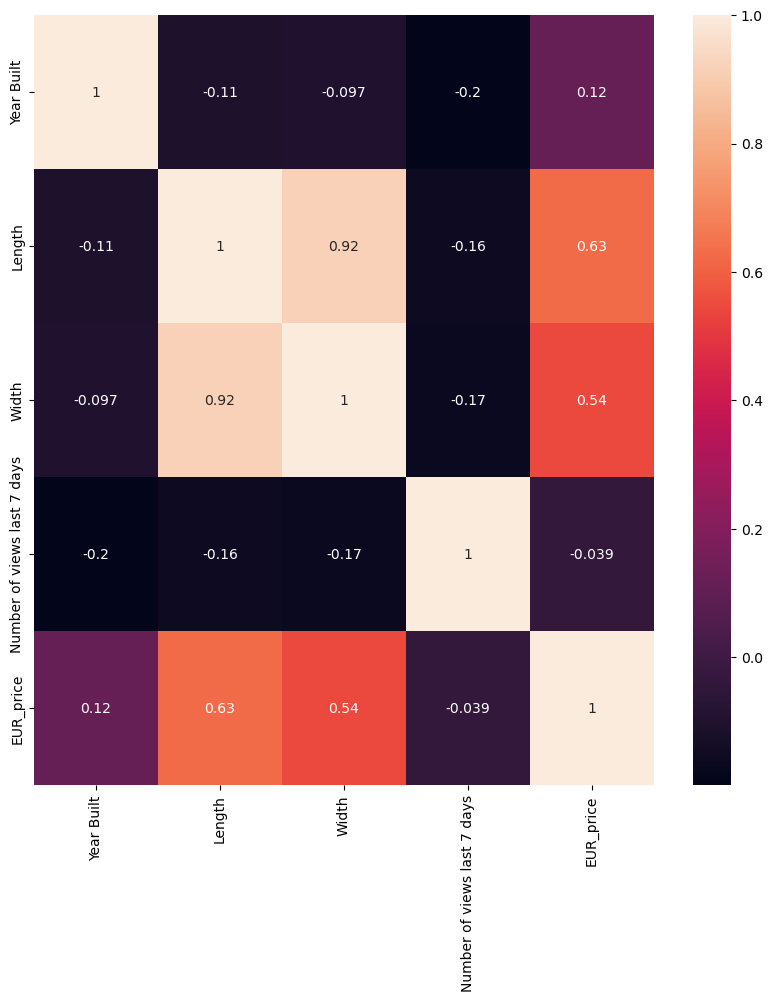

In [9]:
# Create subplot using matplotlib
f,ax = plt.subplots(figsize = (10,10))

# Create correlation heatmap in seaborn 
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

The correlation matrix above shows a very strong relationship bbetween length and width which makes sense as boat sizes increase proportionately. There is also a moderately strong relationship between price and both length and width which suggests the larger the boat the more its valued. Further analysis would have to be conducted to confirm this. Surprisingly the is only a very weak positive correlation between year built and price, i was expected a stronger correlation as i had assumed a newer boat would be more expensive. 

## 03 Scatterplots

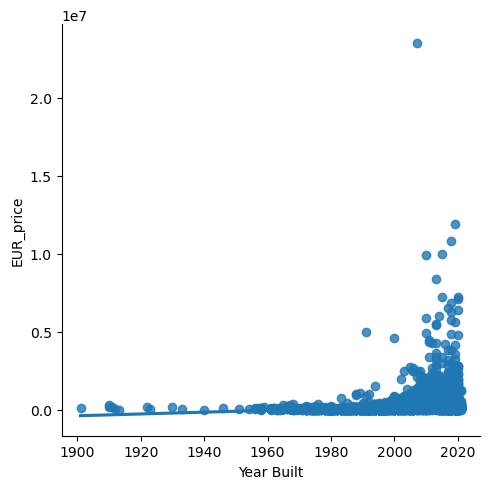

In [10]:
# Scatterplot for the "Year Built" and the "EUR_price"
sns.lmplot(x = 'Year Built', y = 'EUR_price', data = df)

This scatterplot explains the weak correlation we found between year built and price in the correlation matric as we can see the price of boats built before the year 2000 have relatively small distribution. However if we look at boats built after 2000 there is a much larger distribution in price and a clearpositive corrleation between year built and price. We must keep in mind other variables such as boat type and condition also may have affect the price.

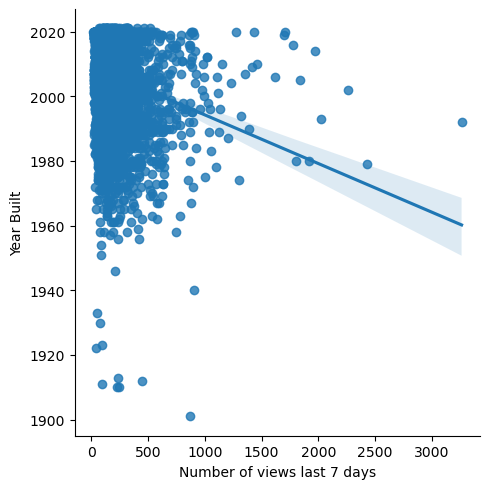

In [11]:
# Scatterplot for the "Number of views last 7 days" and the "Year Built"
sns.lmplot(x = 'Number of views last 7 days', y = 'Year Built', data = df)

There is a weak negative correlation between number of views in last 7 days and year built whcih suggests that viewers may be more interested in older boats. However, this may simply be down to the fact older boats tend to be less expensive and are therefore more suited to the budget of majority of viewers. 

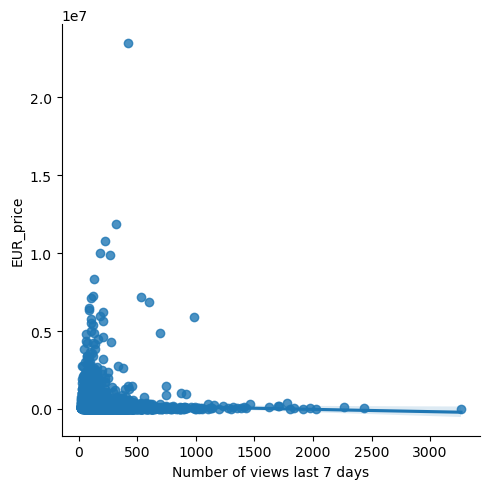

In [12]:
# Scatterplot for the "Number of views last 7 days" and the "EUR_price"
sns.lmplot(x= 'Number of views last 7 days', y = 'EUR_price', data = df)

This scatterplot shows a very weak trend of more expensive boats having fewer views. This could possible be explained by people filtering their searches to exclude more expensive boats as they have a budget. Listings with the most views seem to be priced under EUR 250,000 which suggests this is the upper budget cap for most viewers. There is a boat listed well above 2,000,000 euros that has 500 views in the past 7 days. This may be due to viwers admiring the boat and being curious as to what the highest priced listing was. 

## 04 Pair plots

In [13]:
# Variables we want to use in pair plot
sub.columns

Index(['Year Built', 'Length', 'Width', 'Number of views last 7 days',
       'EUR_price'],
      dtype='object')

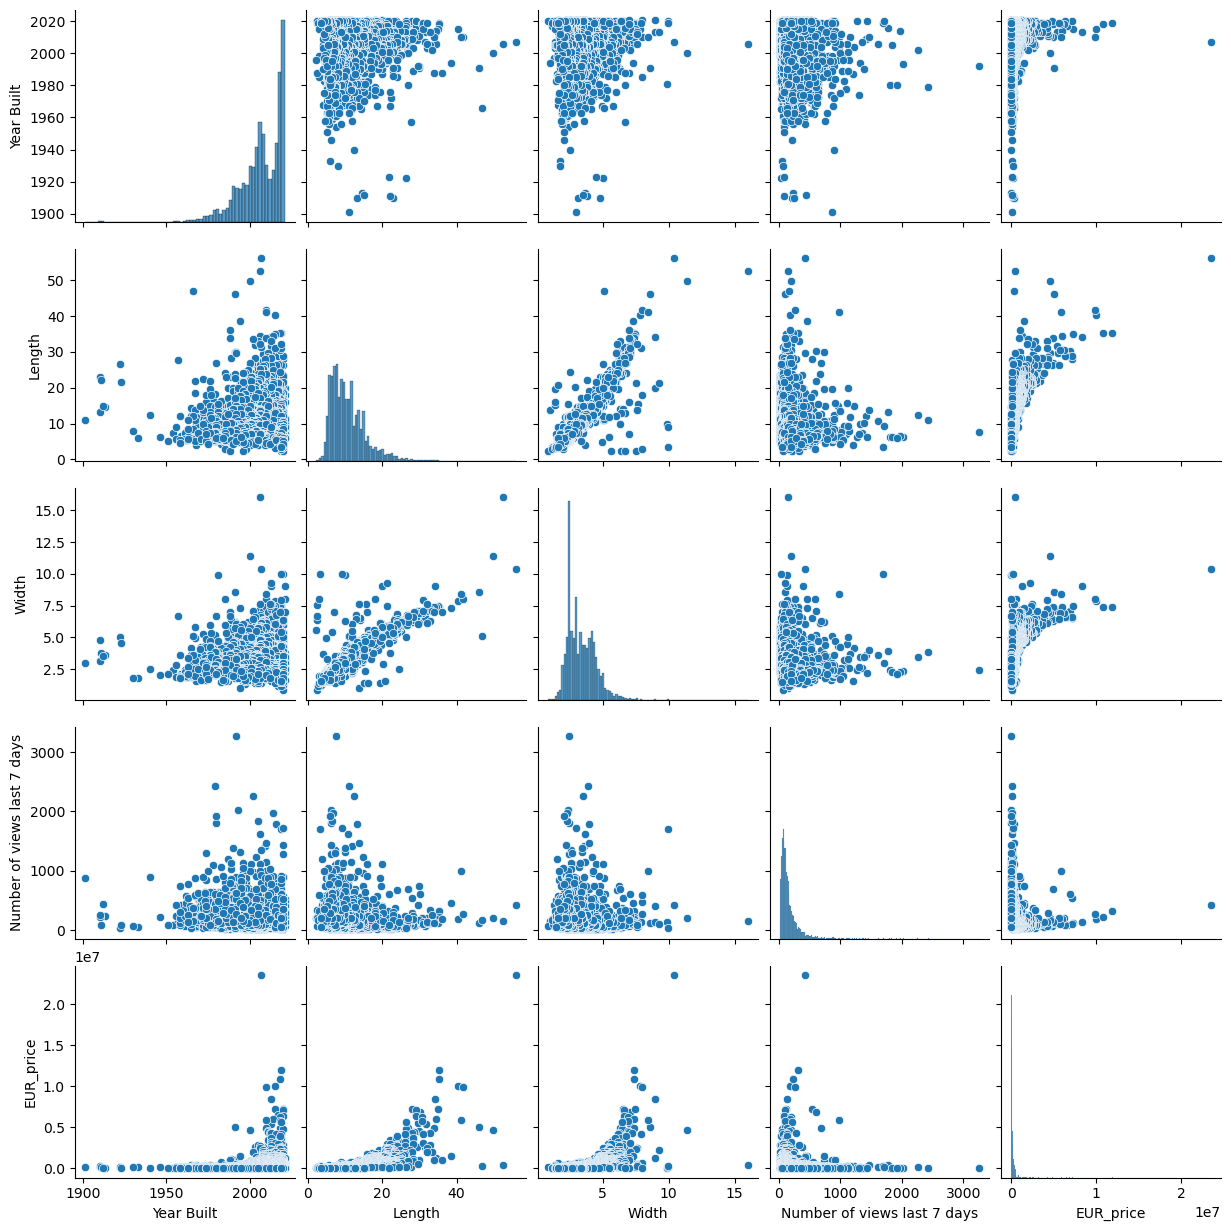

In [14]:
# Create pair plot
g = sns.pairplot(sub)

Since some of the qualitative categorical variables may also have an impact on number of views and price the pair plots don't really help us gain any new insights. Although, we can see as length/ width increases there is a tendency towards fewer views, but this is probably related to the fact larger boats are more expensive. 

## 05 Categorical plot

<AxesSubplot:xlabel='EUR_price', ylabel='Count'>

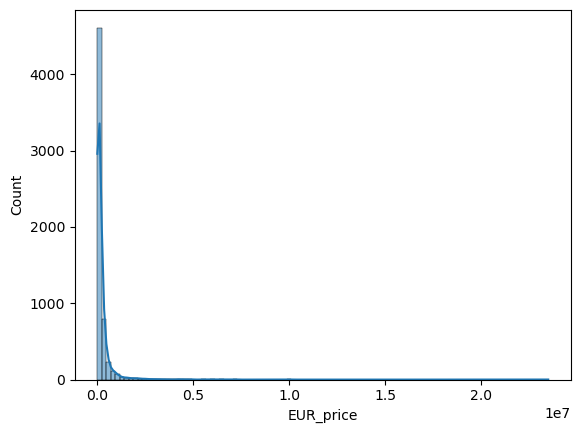

In [15]:
# Creating a histogram to visualise the distribution of price to then determine sensible categories for price ranges
# Don't want too few observations in any of the categories. 'kde' argument adds distribution line.
sns.histplot(df['EUR_price'], bins = 100, kde = True)

In [16]:
# Creating boat listing price categories
df.loc[df['EUR_price'] <50000, 'Price Category'] = 'Low price'
df.loc[(df['EUR_price'] >=50000) & (df['EUR_price'] <=150000), 'Price Category'] = 'Middle price'
df.loc[df['EUR_price'] >150000, 'Price Category'] = 'High price'

In [17]:
df['Price Category'].value_counts(dropna = False)

Middle price    2114
High price      2045
Low price       1842
Name: Price Category, dtype: int64

In [18]:
df.columns

Index(['Boat Type', 'Manufacturer', 'Type', 'Year Built', 'Length', 'Width',
       'Material', 'Number of views last 7 days', 'EUR_price', 'Country',
       'City', 'Price Category'],
      dtype='object')

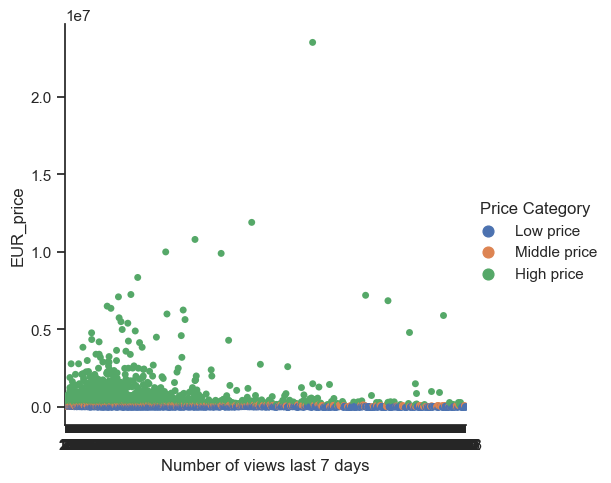

In [20]:
# Creating categorical plot using 'Price Category', 'EUR_price' and 'Number of views in past 7 days'
sns.set(style='ticks')
g = sns.catplot(x = 'Number of views last 7 days', y = 'EUR_price', hue = 'Price Category', data = df)

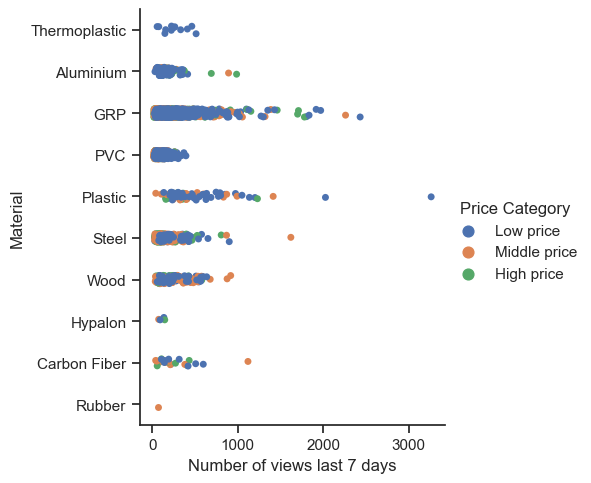

In [22]:
# Creating a categorical plot using 'Price Category', 'Material' and 'Number of views last 7 days'
sns.set(style='ticks')
g = sns.catplot(x = 'Number of views last 7 days', y = 'Material', hue = 'Price Category', data = df)

## 06 Questions

What are the characteristics of the most viewed boat listings in the last 7 days? Most viewed boats in the past 7 days were more than EUR 150,000

Is there a correlation between price and views? Very weak correlation (higher price, fewer views)

What features do the most viewed listings have in common? Weak negative correlation between year built and views, length and views and width and views. 

## 07 Hypothesis

If a boat is listed above EUR 150,000 then it will get more views.

Bigger boats get fewer views.